In [1]:
%pylab inline
from collections import OrderedDict, Counter
import pandas as pd
import proplot as plot
import seaborn as sns
from textwrap import wrap
plot.rc.fontname = 'Arial'
plot.rc.large = 14
plot.rc.small = 22
plot.rc.ticklen = 10
plot.rc.tickratio = 0.5
plot.rc.linewidth = 2
plot.rc.margin = 0.05
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams["font.weight"] = "bold"

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/scratch/ipykernel_28641/921734182.py:8: ProplotWarning: rc setting 'large' was renamed to 'font.largesize' in version 0.6.
  plot.rc.large = 14
/scratch/ipykernel_28641/921734182.py:9: ProplotWarning: rc setting 'small' was renamed to 'font.smallsize' in version 0.6.
  plot.rc.small = 22
/scratch/ipykernel_28641/921734182.py:11: ProplotWarning: rc setting 'tick.ratio' was renamed to 'tick.widthratio' in version 0.8.
  plot.rc.tickratio = 0.5
/scratch/ipykernel_28641/921734182.py:12: ProplotWarning: rc setting 'linewidth' was renamed to 'meta.width' in version 0.8.
  plot.rc.linewidth = 2


TE up: ≥ 4/82 gene ratio

 

TE down: ≥ 9/134 gene ratio

 

RNA DE up: ≥ 6/305 gene ratio

 

RNA DE down: ≥ 5/81 gene ratio

In [2]:
def myround(x, base=50):
    return base * round(x/base)

def plot_go(df_subset, scale_factor=20, figsize=(15, 12), xlim=None):
    fig, ax = plt.subplots(figsize=figsize)
    xidx = -np.log10(df_subset.GeneRatio)
    xidx = df_subset.GeneRatio
    yidx = np.arange(df_subset.shape[0])
    
    ylabels = df_subset.ID_str
    #ylabels = ['\n'.join(wrap(l, 30)) for l in ylabels]

    X, Y = np.meshgrid(xidx, yidx)

    sizes = df_subset['Count']*scale_factor
    counts = df_subset['Count']
    counts_unique = np.array(counts.unique())
    sizes_and_counts = zip(sizes.tolist(), counts)
    print(len(counts_unique))
    size_indexes = np.arange(0, len(counts_unique), int(len(counts_unique)/4))
    print(size_indexes)
    print(counts_unique)
    count_labels = list(counts_unique[size_indexes])

    for idx, row in df_subset.iterrows():
        #-np.log10(row['GeneRatio'])
        size = row['Count']

        if size in count_labels:
            a = ax.scatter(row['GeneRatio'], idx, 
                           s=row['Count']*scale_factor,
                           c='#7fcdbb', label = myround(size,5)),
            count_labels.remove(size)
        else:
            a = ax.scatter(row['GeneRatio'], idx, 
                           s=row['Count']*scale_factor,
                           c='#7fcdbb')# label = counts[idx]),
                       #cmap="OrRd")

    
    ax.set_yticks(yidx)

    if xlim is not None:
        ax.set_xlim(xlim)

    xlabels = np.round(np.array(list(sorted(unique(xidx)))),2)
    #ax.set_xticks(list(sorted(unique(xidx))))
    #ax.set_xticklabels(xlabels, rotation=90, ha="center")
    ax.set_yticklabels(ylabels)

    #ax.set_xlabel("GeneRatio")
    #ax.set_ylabel("Cluster")
    ax.yaxis.set_tick_params(which='minor', bottom=False)
    ax.xaxis.set_tick_params(which='minor', bottom=False)

    ax.legend(loc=(1.05, 0.5), frameon=False, title='Count', labelspacing=1)
    ax.set_ylabel('')#Term')
    ax.set_xlabel('Gene Ratio')
    
    ax.grid(False)
    fig.tight_layout()
    return fig


def plot_go2(df_subset, scale_factor=20, figsize=(15, 12), xlim=None):
    fig, ax = plt.subplots(figsize=figsize)
    xidx = -np.log10(df_subset.GeneRatio)
    xidx = df_subset.GeneRatio
    yidx = np.arange(df_subset.shape[0])
    
    ylabels = df_subset.ID_str
    #ylabels = ['\n'.join(wrap(l, 30)) for l in ylabels]

    X, Y = np.meshgrid(xidx, yidx)

    sizes = df_subset['Count']*scale_factor
    counts = df_subset['Count']
    counts_unique = np.array(counts.unique())
    sizes_and_counts = zip(sizes.tolist(), counts)
    print(len(counts_unique))
    size_indexes = np.arange(0, len(counts_unique), int(len(counts_unique)/3))
    print(size_indexes)
    print(counts_unique)
    count_labels = list(counts_unique[size_indexes])

    for idx, row in df_subset.iterrows():
        #-np.log10(row['GeneRatio'])
        size = row['Count']

        if size in count_labels:
            a = ax.scatter(row['GeneRatio'], idx, 
                           s=row['Count']*scale_factor,
                           c='#7fcdbb', label = myround(size,5)),
            count_labels.remove(size)
        else:
            a = ax.scatter(row['GeneRatio'], idx, 
                           s=row['Count']*scale_factor,
                           c='#7fcdbb')# label = counts[idx]),
                       #cmap="OrRd")

    
    ax.set_yticks(yidx)

    if xlim is not None:
        ax.set_xlim(xlim)

    xlabels = np.round(np.array(list(sorted(unique(xidx)))),2)
    #ax.set_xticks(list(sorted(unique(xidx))))
    #ax.set_xticklabels(xlabels, rotation=90, ha="center")
    ax.set_yticklabels(ylabels)

    #ax.set_xlabel("GeneRatio")
    #ax.set_ylabel("Cluster")
    ax.yaxis.set_tick_params(which='minor', bottom=False)
    ax.xaxis.set_tick_params(which='minor', bottom=False)

    ax.legend(loc=(1.05, 0.5), frameon=False, title='Count', labelspacing=1)
    ax.set_ylabel('')#Term')
    ax.set_xlabel('Gene Ratio')
    
    ax.grid(False)
    fig.tight_layout()
    return fig

def plot_go3(df_subset, scale_factor=20, figsize=(15, 12), xlim=None):
    fig, ax = plt.subplots(figsize=figsize)
    xidx = -np.log10(df_subset.GeneRatio)
    xidx = df_subset.GeneRatio
    yidx = np.arange(df_subset.shape[0])
    
    ylabels = df_subset.ID_str
    #ylabels = ['\n'.join(wrap(l, 30)) for l in ylabels]

    X, Y = np.meshgrid(xidx, yidx)

    sizes = df_subset['Count']*scale_factor
    counts = df_subset['Count']
    counts_unique = np.array(counts.unique())
    sizes_and_counts = zip(sizes.tolist(), counts)
    print(len(counts_unique))
    size_indexes = np.arange(0, len(counts_unique), int(len(counts_unique)/2))
    print(size_indexes)
    print(counts_unique)
    count_labels = list(counts_unique[size_indexes])

    for idx, row in df_subset.iterrows():
        #-np.log10(row['GeneRatio'])
        size = row['Count']

        if size in count_labels:
            a = ax.scatter(row['GeneRatio'], idx, 
                           s=row['Count']*scale_factor,
                           c='#7fcdbb', label = myround(size,5)),
            count_labels.remove(size)
        else:
            a = ax.scatter(row['GeneRatio'], idx, 
                           s=row['Count']*scale_factor,
                           c='#7fcdbb')# label = counts[idx]),
                       #cmap="OrRd")

    
    ax.set_yticks(yidx)

    if xlim is not None:
        ax.set_xlim(xlim)

    xlabels = np.round(np.array(list(sorted(unique(xidx)))),2)
    #ax.set_xticks(list(sorted(unique(xidx))))
    #ax.set_xticklabels(xlabels, rotation=90, ha="center")
    ax.set_yticklabels(ylabels)

    #ax.set_xlabel("GeneRatio")
    #ax.set_ylabel("Cluster")
    ax.yaxis.set_tick_params(which='minor', bottom=False)
    ax.xaxis.set_tick_params(which='minor', bottom=False)

    ax.legend(loc=(1.05, 0.5), frameon=False, title='Count', labelspacing=1)
    ax.set_ylabel('')#Term')
    ax.set_xlabel('Gene Ratio')
    
    ax.grid(False)
    fig.tight_layout()
    return fig

def plot_go4(df_subset, scale_factor=20, figsize=(15, 12), xlim=None):
    fig, ax = plt.subplots(figsize=figsize)
    xidx = -np.log10(df_subset.GeneRatio)
    xidx = df_subset.GeneRatio
    yidx = np.arange(df_subset.shape[0])
    
    ylabels = df_subset.ID_str
    #ylabels = ['\n'.join(wrap(l, 30)) for l in ylabels]

    X, Y = np.meshgrid(xidx, yidx)

    sizes = df_subset['Count']*scale_factor
    counts = df_subset['Count']
    counts_unique = np.array(counts.unique())
    sizes_and_counts = zip(sizes.tolist(), counts)
    print(len(counts_unique))
    size_indexes = np.arange(0, len(counts_unique), int(len(counts_unique)/1))
    print(size_indexes)
    print(counts_unique)
    count_labels = list(counts_unique[size_indexes])

    for idx, row in df_subset.iterrows():
        #-np.log10(row['GeneRatio'])
        size = row['Count']

        if size in count_labels:
            a = ax.scatter(row['GeneRatio'], idx, 
                           s=row['Count']*scale_factor,
                           c='#7fcdbb', label = myround(size,5)),
            count_labels.remove(size)
        else:
            a = ax.scatter(row['GeneRatio'], idx, 
                           s=row['Count']*scale_factor,
                           c='#7fcdbb')# label = counts[idx]),
                       #cmap="OrRd")

    
    ax.set_yticks(yidx)

    if xlim is not None:
        ax.set_xlim(xlim)

    xlabels = np.round(np.array(list(sorted(unique(xidx)))),2)
    #ax.set_xticks(list(sorted(unique(xidx))))
    #ax.set_xticklabels(xlabels, rotation=90, ha="center")
    ax.set_yticklabels(ylabels)

    #ax.set_xlabel("GeneRatio")
    #ax.set_ylabel("Cluster")
    ax.yaxis.set_tick_params(which='minor', bottom=False)
    ax.xaxis.set_tick_params(which='minor', bottom=False)

    ax.legend(loc=(1.05, 0.5), frameon=False, title='Count', labelspacing=1)
    ax.set_ylabel('')#Term')
    ax.set_xlabel('Gene Ratio')
    
    ax.grid(False)
    fig.tight_layout()
    return fig

5
[0 2 4]
[4 5 6 7 9]


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,ID_str
0,enzyme regulator activity (GO:0030234),enzyme regulator activity (GO:0030234),0.048780,212/5657,0.369464,0.983074,0.983074,CR_04060C/C3_05000W/C5_03570W/C3_01990W,4,enzyme regulator activity
1,pathogenesis (GO:0009405),pathogenesis (GO:0009405),0.048780,264/5657,0.537188,0.983074,0.983074,C4_02320C/C6_03650C/C7_04230W/C2_00140W,4,pathogenesis
2,interspecies interaction between organisms (GO...,interspecies interaction between organisms (GO...,0.048780,324/5657,0.699575,0.983074,0.983074,C4_02320C/C6_03650C/C7_04230W/C2_00140W,4,interspecies interaction between organisms
3,RNA binding (GO:0003723),RNA binding (GO:0003723),0.048780,343/5657,0.741761,0.983074,0.983074,C1_11280W/C5_00030W/CR_06840W/C3_02470C,4,RNA binding
4,transporter activity (GO:0005215),transporter activity (GO:0005215),0.048780,364/5657,0.783111,0.983074,0.983074,C2_00610C/C3_04270C/C4_00330C/C4_03700W,4,transporter activity
5,cellular bud (GO:0005933),cellular bud (GO:0005933),0.060976,149/5657,0.064247,0.983074,0.983074,C1_06690W/C3_06610W/C4_00860C/C4_00370W/C3_05000W,5,cellular bud
6,site of polarized growth (GO:0030427),site of polarized growth (GO:0030427),0.060976,187/5657,0.133953,0.983074,0.983074,C1_06690W/C3_06610W/C4_00860C/C4_00370W/C3_05000W,5,site of polarized growth
7,ribosome biogenesis (GO:0042254),ribosome biogenesis (GO:0042254),0.060976,296/5657,0.429578,0.983074,0.983074,C2_01580W/C3_01990W/CR_06840W/C3_05240C/CR_07630C,5,ribosome biogenesis
8,response to drug (GO:0042493),response to drug (GO:0042493),0.060976,386/5657,0.667439,0.983074,0.983074,C6_03650C/C4_04420W/C4_03700W/C7_04230W/C2_00140W,5,response to drug
9,cell cycle (GO:0007049),cell cycle (GO:0007049),0.060976,442/5657,0.779031,0.983074,0.983074,C1_06690W/C2_06530W/C4_00370W/C1_04520C/C2_00140W,5,cell cycle


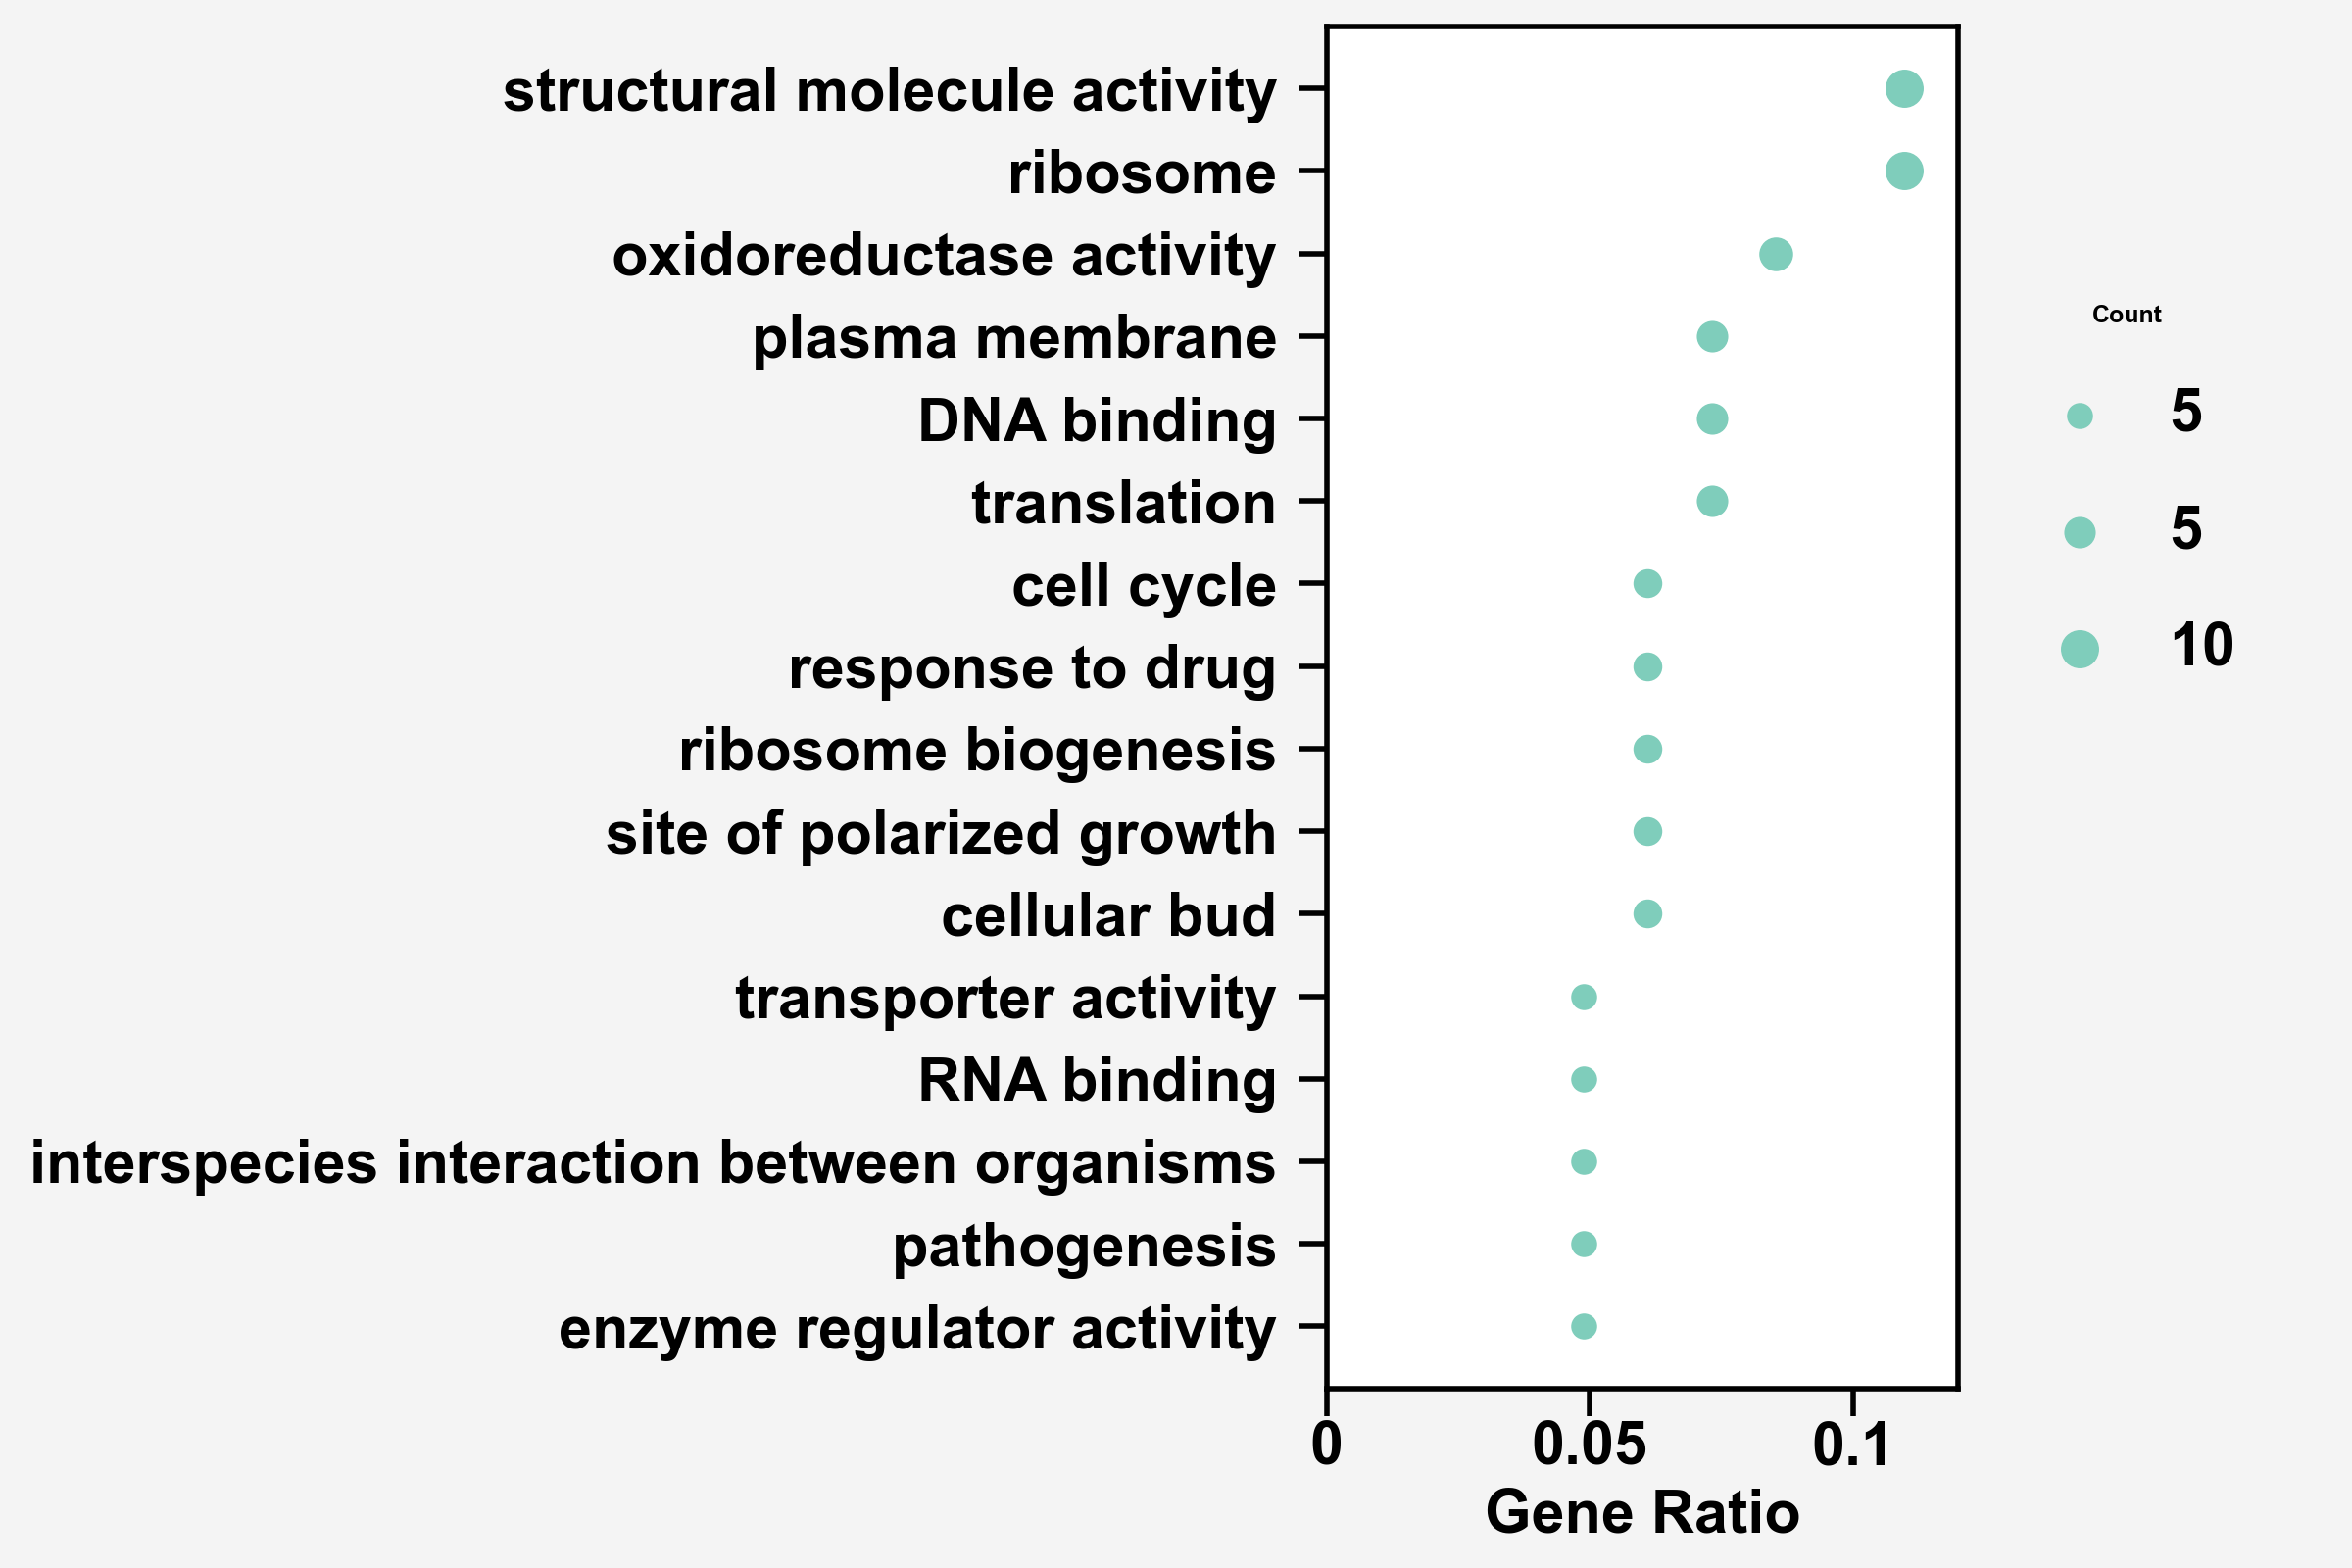

In [3]:
df = pd.read_csv('../plotsv2/01.Ontology_slim/TE/TE_biofilm_VS_planktonic_log2FC1_padj05_pos_cutoff05.tsv', sep=",")
df['GeneRatio'] = df['GeneRatio'].apply(lambda x: eval(x))


df['ID_str'] = df.ID.str.split('(').str.get(0)
df_subset = df.loc[df.GeneRatio >= 4/82].sort_values(by=['pvalue', 'GeneRatio'], 
                                                                   ascending=[True, False]).reset_index(drop=True)
#df_subset = df[df.pvalue<= 0.1]
df_subset = df_subset.sort_values(by=['pvalue', 'GeneRatio'], 
                                                                   ascending=[True, False]).reset_index(drop=True)

df_subset = df_subset.sort_values(by=['GeneRatio', 'pvalue'], 
                                           ascending=[True, True]).reset_index(drop=True)
#df_subset['GeneRatio'] = np.round(df_subset['GeneRatio'], 2)
fig = plot_go3(df_subset, xlim = [0,0.12], figsize=[12, 8])

fig.savefig('../figures/TE_up.pdf')
df_subset

7
[0 2 4 6]
[ 9 10 12 13 14 17 18]


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,ID_str
0,Golgi apparatus (GO:0005794),Golgi apparatus (GO:0005794),0.067164,165/5657,0.015919,0.222868,0.196895,C1_10420C/C7_02180C/C4_00310C/CR_06090W/C1_124...,9,Golgi apparatus
1,endoplasmic reticulum (GO:0005783),endoplasmic reticulum (GO:0005783),0.067164,199/5657,0.045762,0.266756,0.235668,CR_08300C/C1_03450C/C1_00870W/CR_06470W/C1_106...,9,endoplasmic reticulum
2,signal transduction (GO:0007165),signal transduction (GO:0007165),0.074627,213/5657,0.029016,0.266756,0.235668,C4_01670C/C1_07970C/CR_06090W/C3_03890W/CR_064...,10,signal transduction
3,lipid metabolic process (GO:0006629),lipid metabolic process (GO:0006629),0.074627,272/5657,0.109865,0.410162,0.362361,CR_08300C/C1_00870W/CR_07100W/CR_02540W/CR_012...,10,lipid metabolic process
4,cell cycle (GO:0007049),cell cycle (GO:0007049),0.074627,442/5657,0.608486,0.896940,0.792409,C4_00030C/C4_00790C/C4_00310C/C5_00210C/CR_070...,10,cell cycle
5,vesicle-mediated transport (GO:0016192),vesicle-mediated transport (GO:0016192),0.089552,316/5657,0.070135,0.302120,0.266911,C1_00320W/CR_01770C/C1_10420C/C7_02180C/C4_071...,12,vesicle-mediated transport
6,response to drug (GO:0042493),response to drug (GO:0042493),0.089552,386/5657,0.202072,0.514366,0.454421,C2_09510C/C1_07970C/C2_02520W/C3_03290C/C1_034...,12,response to drug
7,cellular homeostasis (GO:0019725),cellular homeostasis (GO:0019725),0.097015,200/5657,0.000833,0.046656,0.041218,C3_01140W/C6_00340C/C6_04580W/C3_05410W/C3_005...,13,cellular homeostasis
8,pathogenesis (GO:0009405),pathogenesis (GO:0009405),0.097015,264/5657,0.009328,0.174123,0.153830,C1_09530W/C1_07970C/C6_04580W/CR_08300C/C2_072...,13,pathogenesis
9,interspecies interaction between organisms (GO...,interspecies interaction between organisms (GO...,0.097015,324/5657,0.042332,0.266756,0.235668,C1_09530W/C1_07970C/C6_04580W/CR_08300C/C2_072...,13,interspecies interaction between organisms


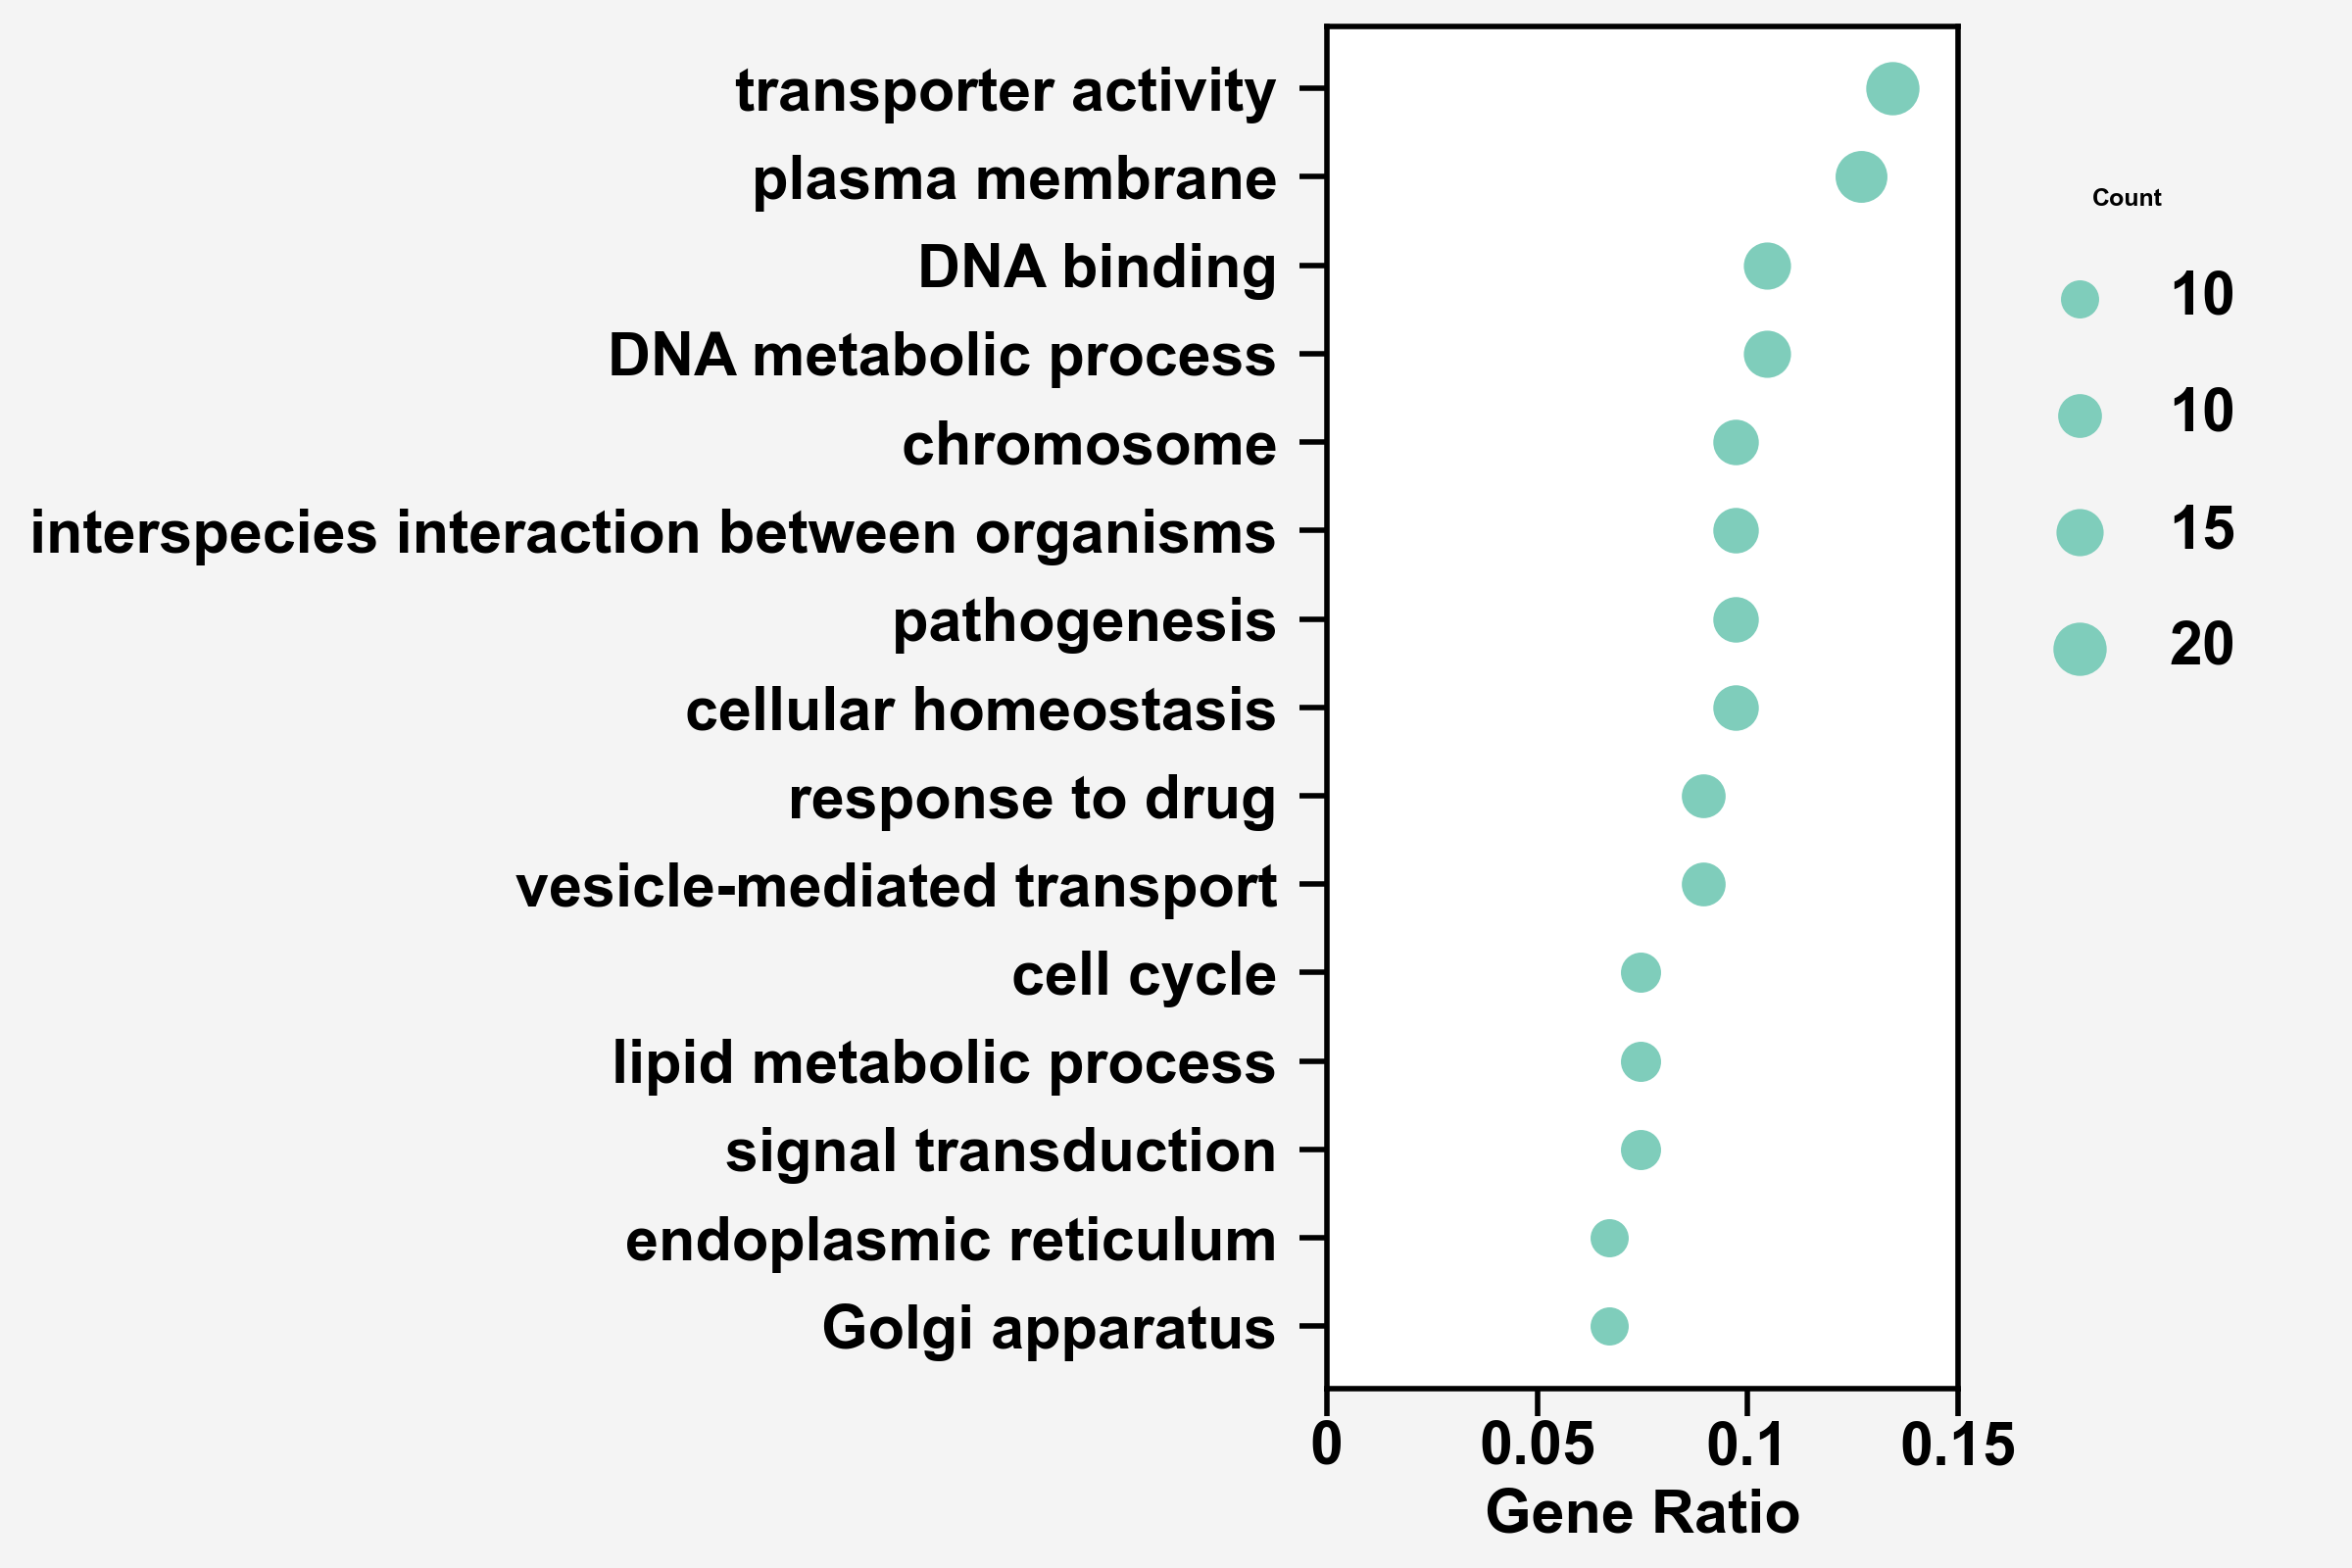

In [4]:
df = pd.read_csv('../plotsv2/01.Ontology_slim//TE/TE_biofilm_VS_planktonic_log2FC1_padj05_neg_cutoff05.tsv', sep=",")
df['GeneRatio'] = df['GeneRatio'].apply(lambda x: eval(x))


df['ID_str'] = df.ID.str.split('(').str.get(0)
df_subset = df.loc[df.GeneRatio >= 9/134].sort_values(by=['pvalue', 'GeneRatio'], 
                                                                   ascending=[True, False]).reset_index(drop=True)
#df_subset = df[df.pvalue<= 0.1]
#df_subset = df_subset.sort_values(by=['pvalue', 'GeneRatio'], 
#                                                                   ascending=[True, False]).reset_index(drop=True)
df_subset = df_subset.sort_values(by=['GeneRatio', 'pvalue'], 
                                           ascending=[True, True]).reset_index(drop=True)
#df_subset['GeneRatio'] = np.round(df_subset['GeneRatio'], 2)
fig = plot_go2(df_subset, xlim = [0,0.15], figsize=[12, 8])
fig.savefig('../figures/TE_down.pdf')
df_subset


19
[ 0  4  8 12 16]
[  6   7   8   9  10  11  12  14  15  17  18  19  20  21  25  48  75 100
 125]


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,ID_str
0,hyphal growth (GO:0030448),hyphal growth (GO:0030448),0.019672,92/5657,3.766767e-01,9.999997e-01,8.738826e-01,C5_02440C/C6_03700W/C6_00950C/C6_04130C/C5_021...,6,hyphal growth
1,extracellular region (GO:0005576),extracellular region (GO:0005576),0.022951,186/5657,8.825913e-01,9.999997e-01,8.738826e-01,C1_05960W/C1_13940W/C1_10290W/C6_04130C/C4_061...,7,extracellular region
2,cell wall (GO:0005618),cell wall (GO:0005618),0.026230,140/5657,4.855475e-01,9.999997e-01,8.738826e-01,C1_05960W/C1_13940W/C6_03700W/C2_05180W/C6_041...,8,cell wall
3,ribosome (GO:0005840),ribosome (GO:0005840),0.026230,180/5657,7.636184e-01,9.999997e-01,8.738826e-01,C2_05160C/C4_06850C/C6_02230W/C1_05500W/CR_041...,8,ribosome
4,DNA metabolic process (GO:0006259),DNA metabolic process (GO:0006259),0.026230,323/5657,9.971591e-01,9.999997e-01,8.738826e-01,C5_02440C/C1_10860C/C7_03850W/C4_05460C/C2_053...,8,DNA metabolic process
5,mitochondrial envelope (GO:0005740),mitochondrial envelope (GO:0005740),0.029508,285/5657,9.751096e-01,9.999997e-01,8.738826e-01,C3_01300C/C1_13940W/CR_03380W/C2_09350W/CR_001...,9,mitochondrial envelope
6,nucleotidyltransferase activity (GO:0016779),nucleotidyltransferase activity (GO:0016779),0.032787,76/5657,7.184990e-03,5.440064e-02,4.753978e-02,C1_10260C/CR_01950W/C1_13870W/C5_01745W/C2_053...,10,nucleotidyltransferase activity
7,cell cycle (GO:0007049),cell cycle (GO:0007049),0.032787,442/5657,9.997612e-01,9.999997e-01,8.738826e-01,C7_03850W/C1_03790C/CR_04820W/C6_00950C/C1_050...,10,cell cycle
8,translation regulator activity (GO:0045182),translation regulator activity (GO:0045182),0.036066,51/5657,6.394739e-05,5.648686e-04,4.936290e-04,CR_04160C/C2_05160C/C7_04130C/C3_06100C/CR_093...,11,translation regulator activity
9,pathogenesis (GO:0009405),pathogenesis (GO:0009405),0.039344,264/5657,7.725309e-01,9.999997e-01,8.738826e-01,C1_04500W/C6_03700W/C1_10860C/C2_09320C/C2_051...,12,pathogenesis


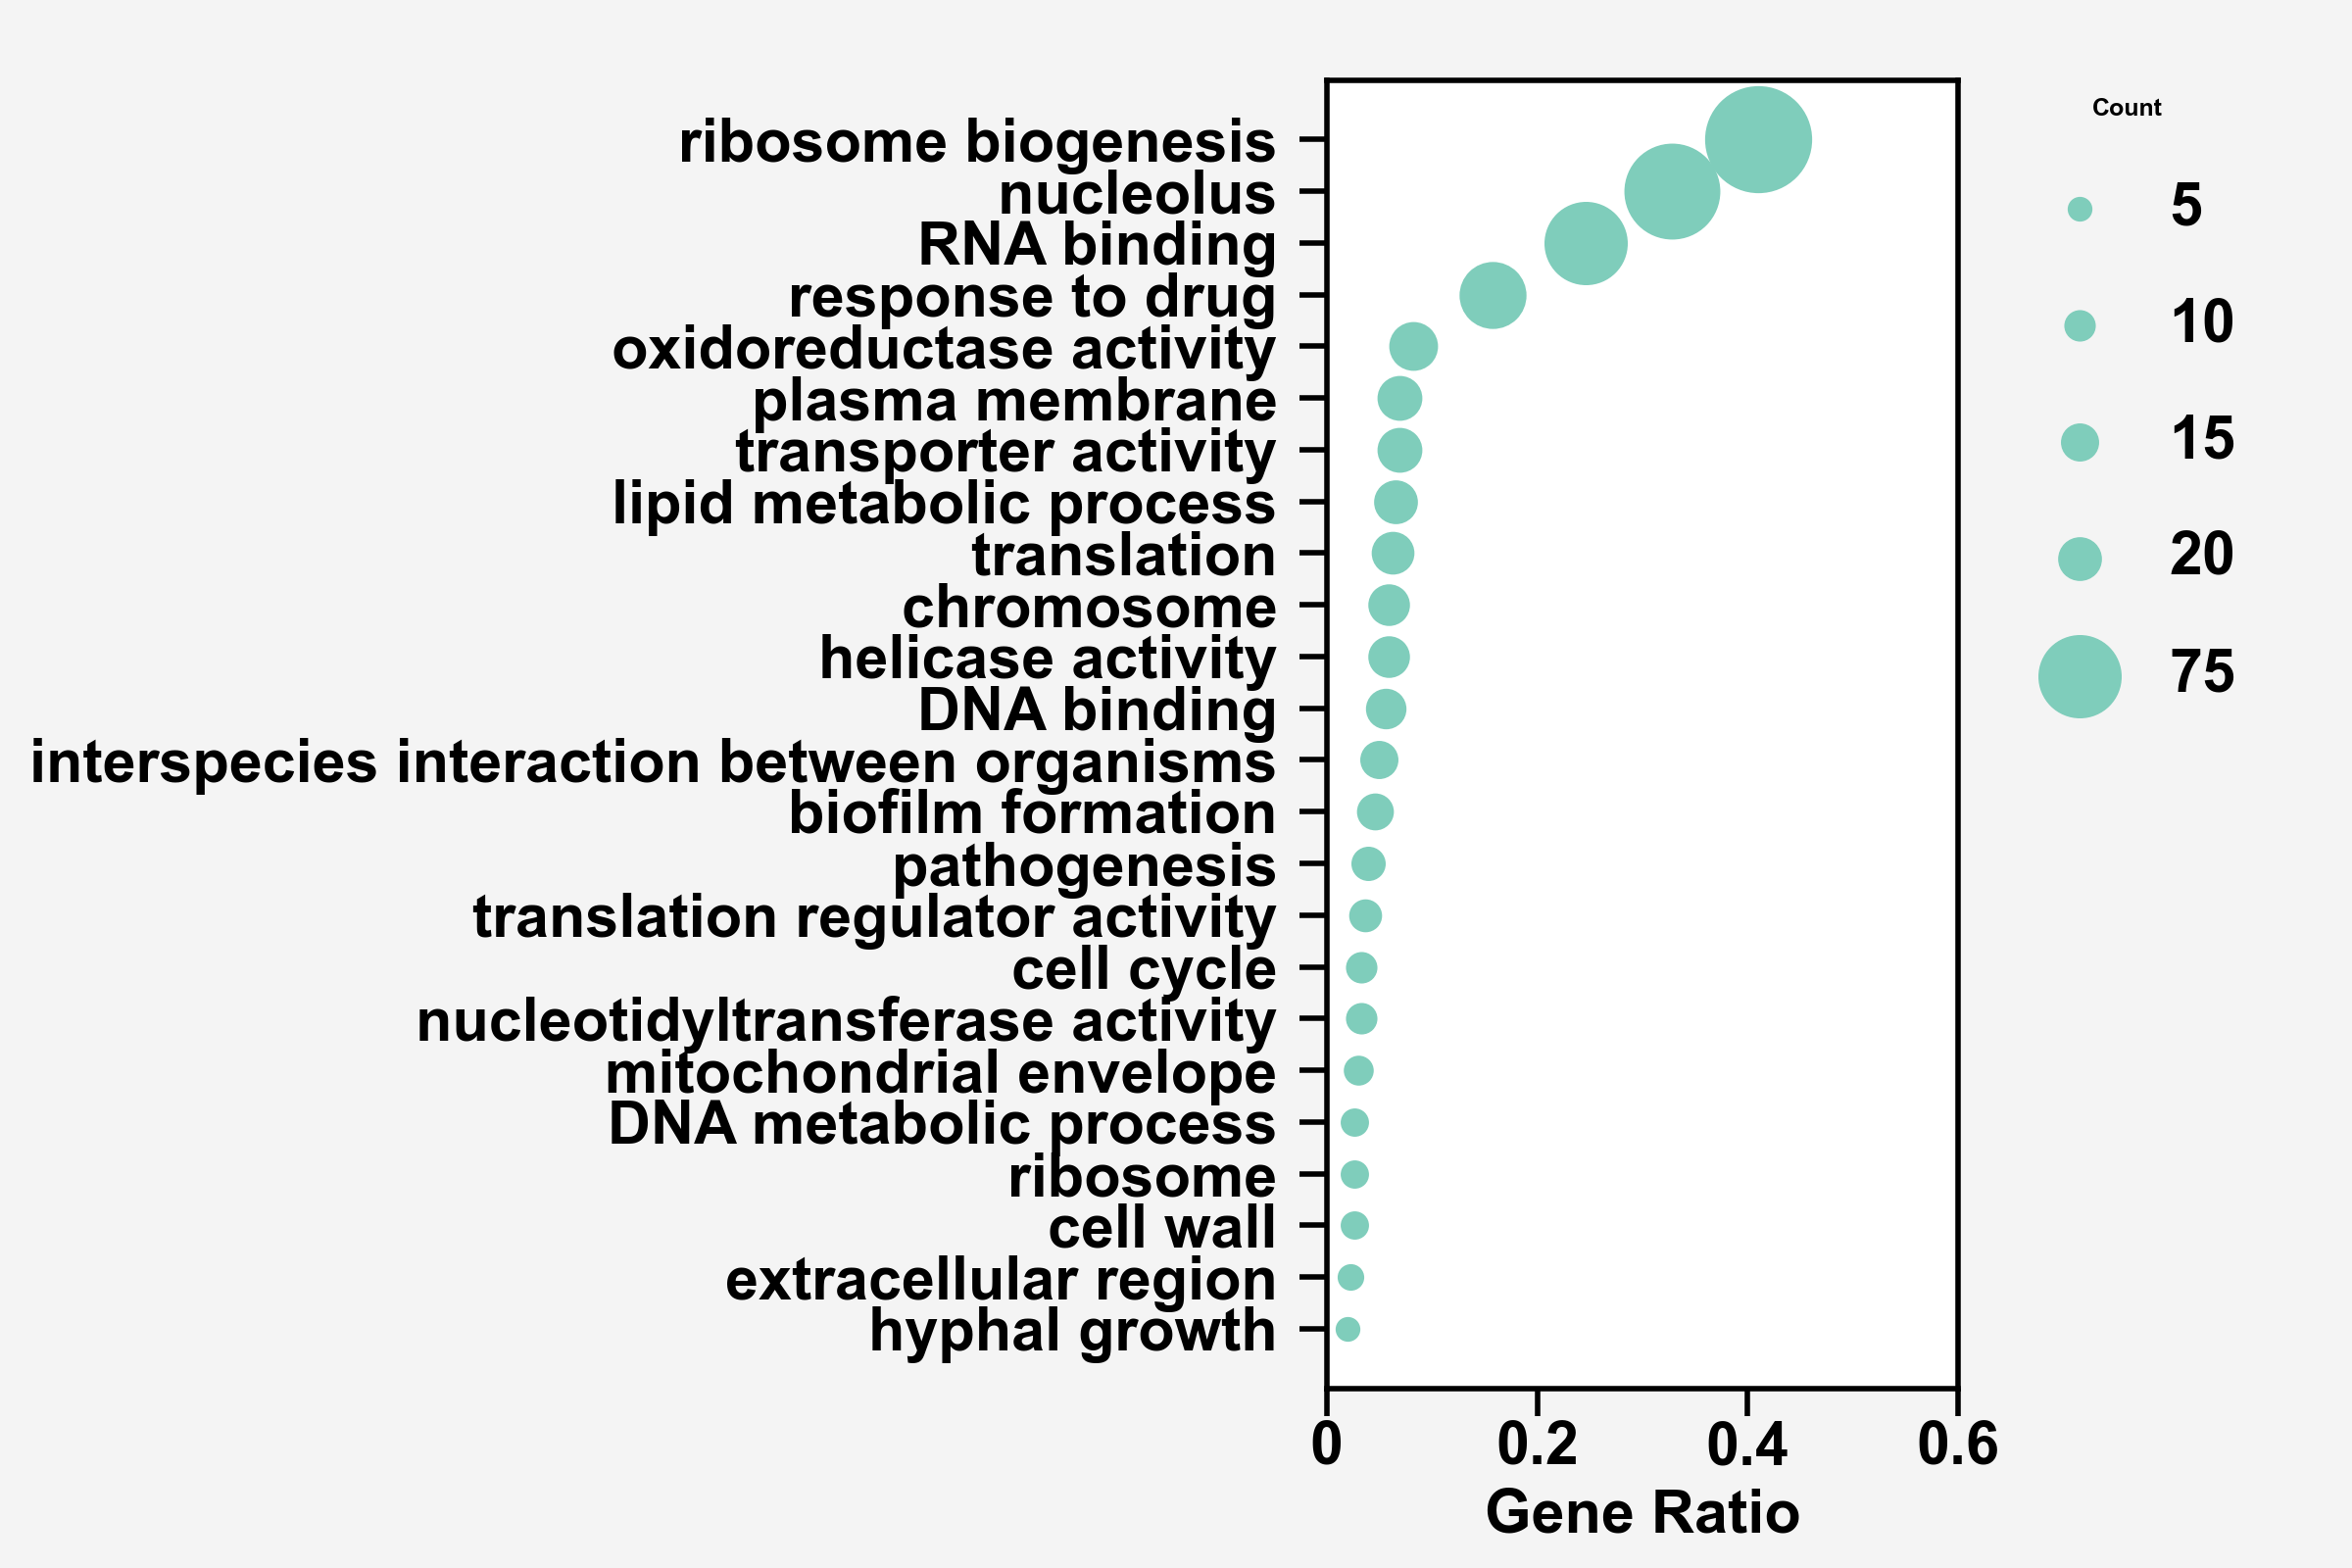

In [8]:
df = pd.read_csv('../plotsv2/01.Ontology_slim/DE_rna/DErna_biofilm_VS_planktonic_log2FC1_padj05_pos_cutoff05.tsv', sep=",")
df['GeneRatio'] = df['GeneRatio'].apply(lambda x: eval(x))


df['ID_str'] = df.ID.str.split('(').str.get(0)
df_subset = df.loc[df.GeneRatio >= 6/305].sort_values(by=['pvalue', 'GeneRatio'], 
                                                                   ascending=[True, False]).reset_index(drop=True)
#df_subset = df[df.pvalue<= 0.1]

df_subset = df_subset.sort_values(by=['GeneRatio', 'pvalue'], 
                                           ascending=[True, True]).reset_index(drop=True)
#df_subset['GeneRatio'] = np.round(df_subset['GeneRatio'], 2)
fig = plot_go(df_subset, scale_factor=12, xlim = [0,0.6], figsize=[12, 8])

fig.savefig('../figures/DE_up.pdf')
df_subset

6
[0]
[ 5  6  7  8  9 11]


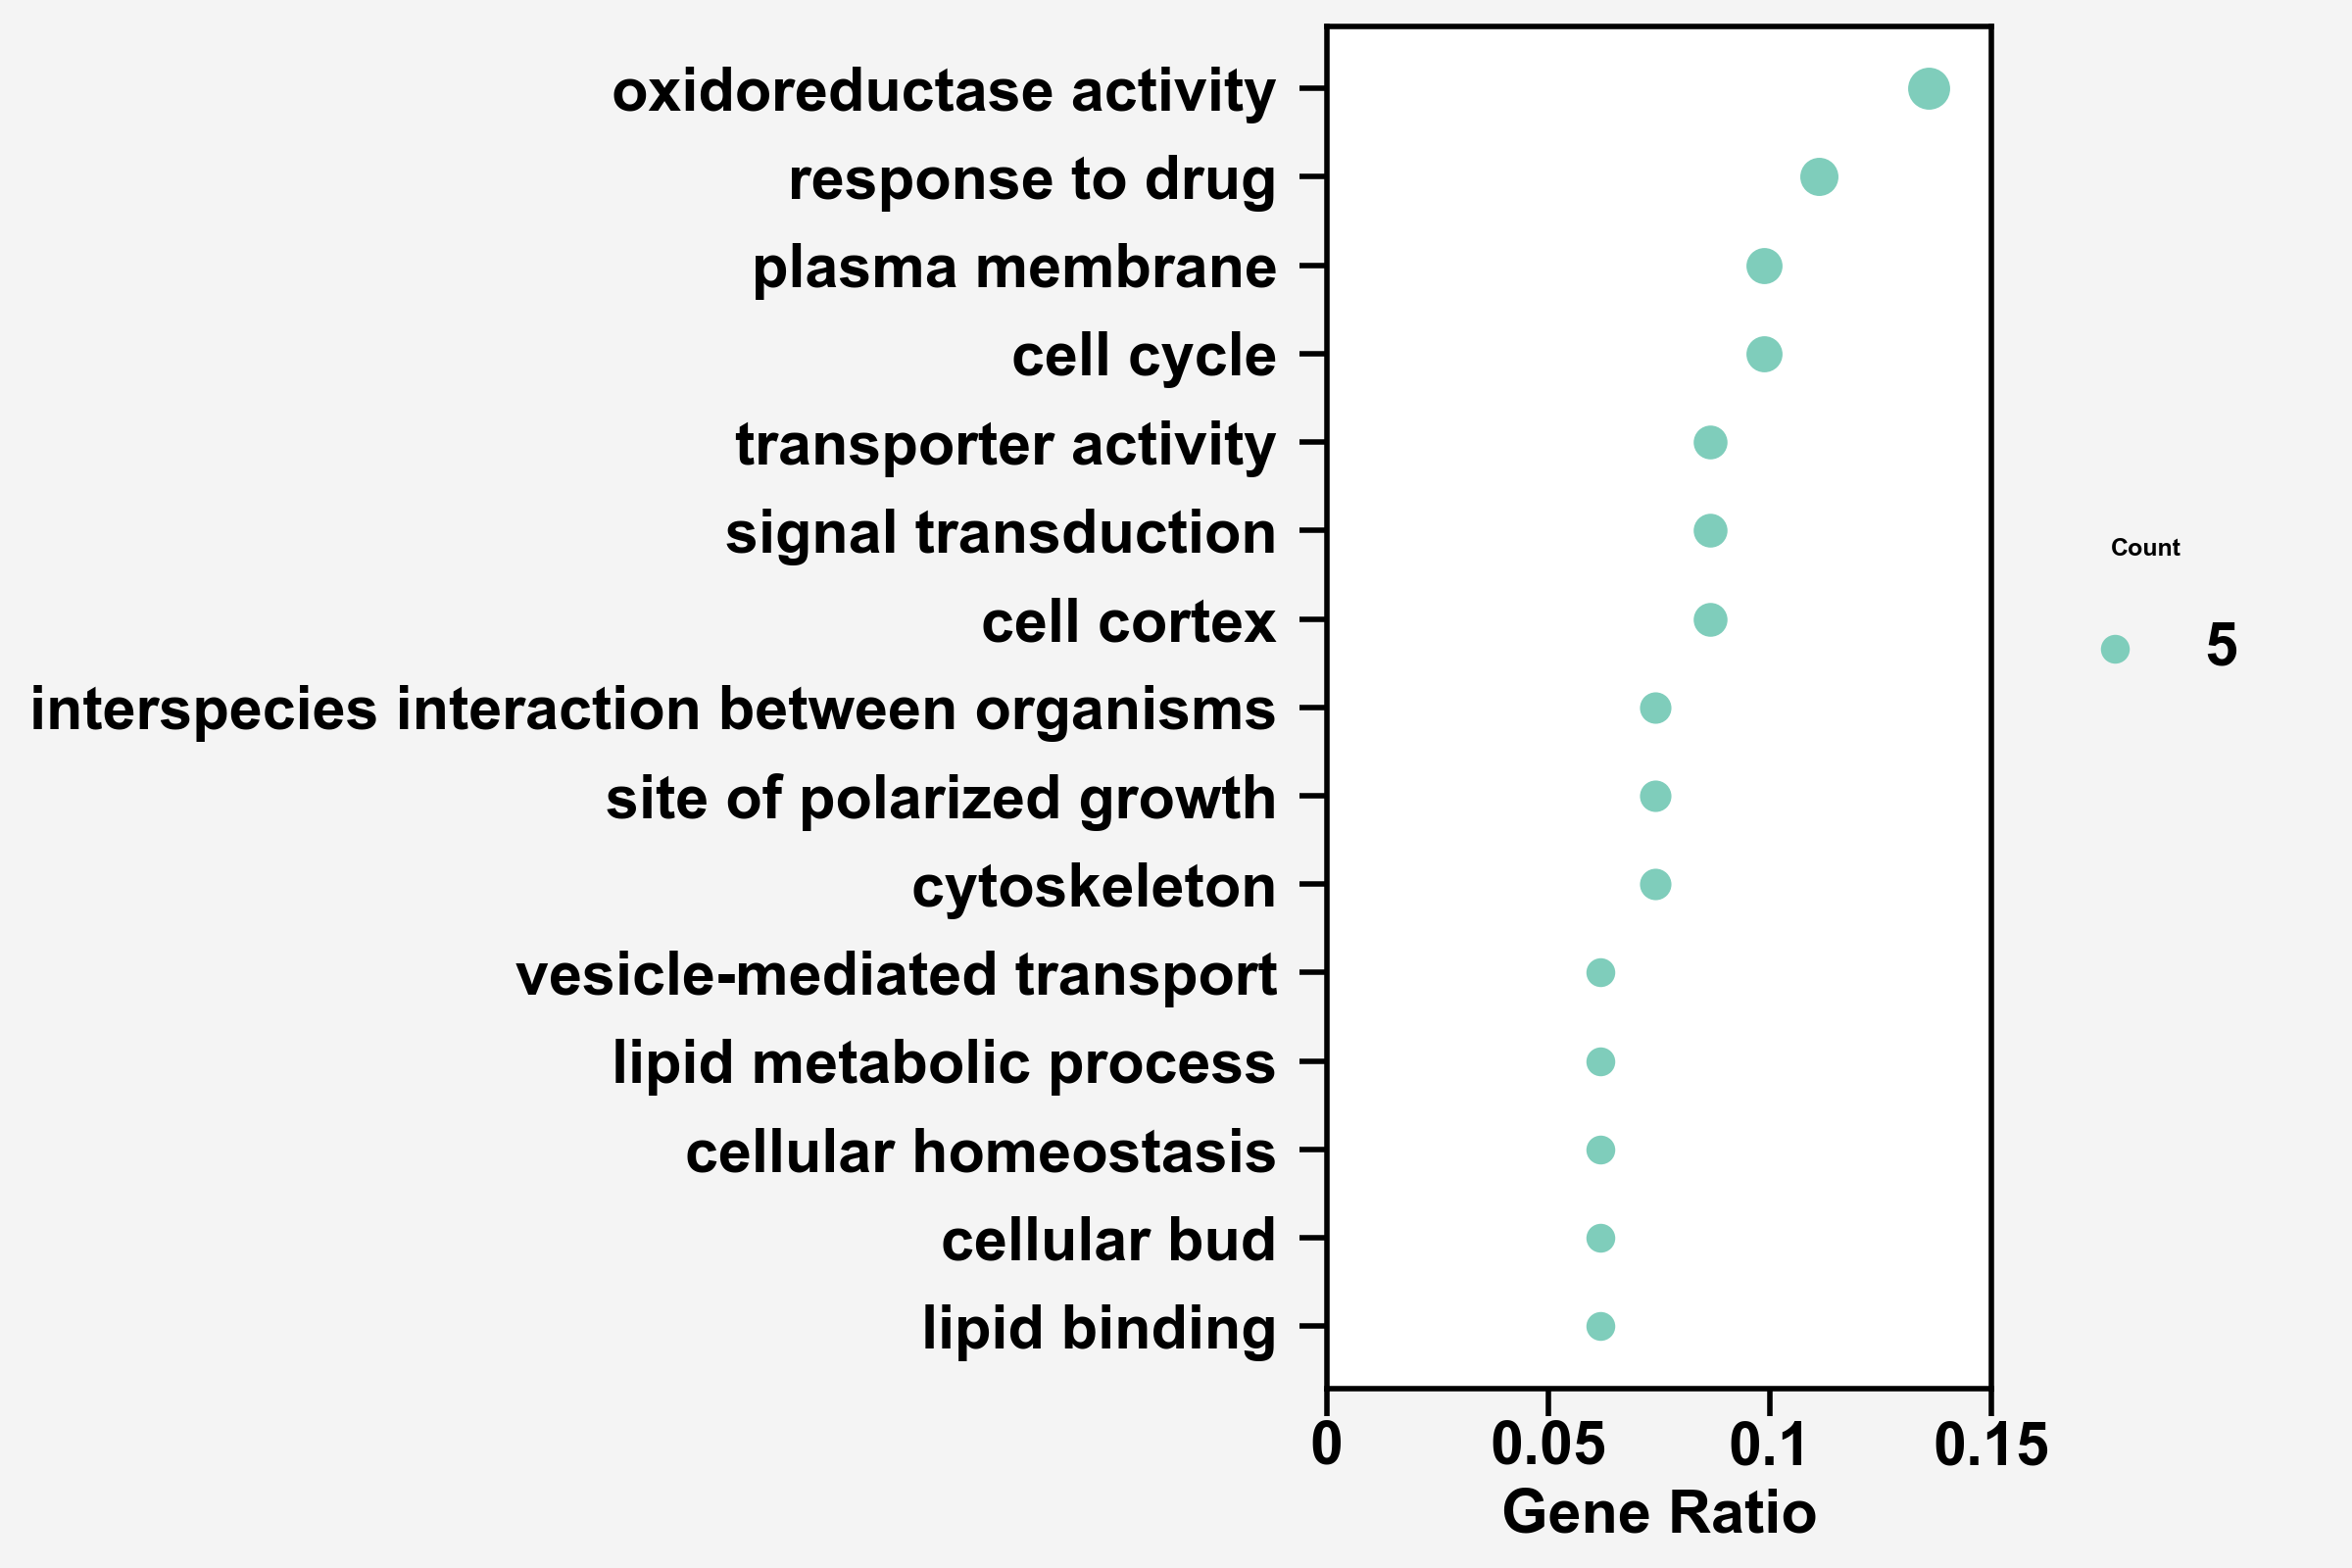

In [9]:
df = pd.read_csv('../plotsv2/01.Ontology_slim/DE_rna/DErna_biofilm_VS_planktonic_log2FC1_padj05_neg_cutoff05.tsv', sep=",")
df['GeneRatio'] = df['GeneRatio'].apply(lambda x: eval(x))


df['ID_str'] = df.ID.str.split('(').str.get(0)
df_subset = df.loc[df.GeneRatio >= 5/81].sort_values(by=['pvalue', 'GeneRatio'], 
                                                                   ascending=[True, False]).reset_index(drop=True)
#df_subset = df[df.pvalue<= 0.1]

df_subset = df_subset.sort_values(by=['GeneRatio', 'pvalue'], 
                                           ascending=[True, True]).reset_index(drop=True)
#df_subset['GeneRatio'] = np.round(df_subset['GeneRatio'], 2)
fig = plot_go4(df_subset, figsize=[12,8], xlim = [0,0.15])

fig.savefig('../figures/DE_down.pdf')

In [10]:
df_subset

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,ID_str
0,lipid binding (GO:0008289),lipid binding (GO:0008289),0.061728,114/5657,0.023172,0.284521,0.252908,C4_06250C/C4_00370W/C1_00920W/C5_02370C/C2_01350C,5,lipid binding
1,cellular bud (GO:0005933),cellular bud (GO:0005933),0.061728,149/5657,0.061578,0.307889,0.273679,C2_01410C/C7_01840W/C4_06250C/C4_00370W/C2_06670C,5,cellular bud
2,cellular homeostasis (GO:0019725),cellular homeostasis (GO:0019725),0.061728,200/5657,0.157705,0.591393,0.525682,C4_06920C/C2_06670C/C2_02180W/C3_01360C/C5_02710W,5,cellular homeostasis
3,lipid metabolic process (GO:0006629),lipid metabolic process (GO:0006629),0.061728,272/5657,0.349811,0.649526,0.577356,C1_12080W/C7_03710C/C3_03680W/C1_10460W/C1_10270C,5,lipid metabolic process
4,vesicle-mediated transport (GO:0016192),vesicle-mediated transport (GO:0016192),0.061728,316/5657,0.476075,0.711695,0.632618,C4_06250C/C4_00370W/C1_00920W/C1_10270C/C2_01350C,5,vesicle-mediated transport
5,cytoskeleton (GO:0005856),cytoskeleton (GO:0005856),0.074074,186/5657,0.049506,0.284521,0.252908,C2_01410C/C7_01840W/C4_00370W/C2_06670C/C3_059...,6,cytoskeleton
6,site of polarized growth (GO:0030427),site of polarized growth (GO:0030427),0.074074,187/5657,0.050582,0.284521,0.252908,C2_01410C/C7_01840W/C4_06250C/C4_00370W/C2_066...,6,site of polarized growth
7,interspecies interaction between organisms (GO...,interspecies interaction between organisms (GO...,0.074074,324/5657,0.318552,0.649526,0.577356,C2_08100W/C4_04780W/C1_03710C/C3_01360C/CR_098...,6,interspecies interaction between organisms
8,cell cortex (GO:0005938),cell cortex (GO:0005938),0.086420,157/5657,0.006906,0.284521,0.252908,C7_01840W/C1_12080W/C4_06250C/C4_00370W/C2_066...,7,cell cortex
9,signal transduction (GO:0007165),signal transduction (GO:0007165),0.086420,213/5657,0.032047,0.284521,0.252908,C7_01840W/C1_12080W/C2_06670C/C7_03710C/C1_022...,7,signal transduction
